In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

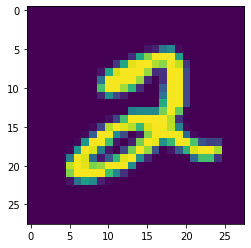

In [4]:
plt.imshow(X_train[5]);

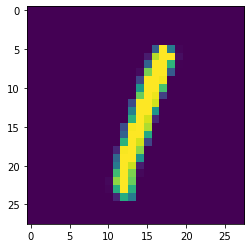

In [28]:
plt.imshow(X_test[5]);

-----------

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.optimizers import SGD

In [9]:
28 * 28/2

392.0

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(Dense(400,activation= "relu"))
encoder.add(Dense(200,activation= "relu"))
encoder.add(Dense(100,activation= "relu"))
encoder.add(Dense(50,activation= "relu"))
encoder.add(Dense(25,activation= "relu"))

In [11]:
decoder = Sequential()
decoder.add(Dense(50,activation= "relu",input_shape = [25]))
decoder.add(Dense(100,activation= "relu"))
decoder.add(Dense(200,activation= "relu"))
decoder.add(Dense(400,activation= "relu"))
decoder.add(Dense(28*28,activation= "sigmoid"))
decoder.add(Reshape(target_shape =  [28,28]))

In [13]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = "accuracy")

In [14]:
autoencoder.fit(X_train,X_train,epochs= 5, validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1656 - accuracy: 0.1870 - val_loss: 0.1305 - val_accuracy: 0.2196
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1240 - accuracy: 0.2397 - val_loss: 0.1172 - val_accuracy: 0.2418
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1146 - accuracy: 0.2548 - val_loss: 0.1106 - val_accuracy: 0.2541
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1090 - accuracy: 0.2637 - val_loss: 0.1071 - val_accuracy: 0.2567
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1047 - accuracy: 0.2711 - val_loss: 0.1036 - val_accuracy: 0.2749


In [15]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                420625    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            421384    
                                                                 
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [31]:
reconstruct = autoencoder.predict(X_test[:100])

Original Image


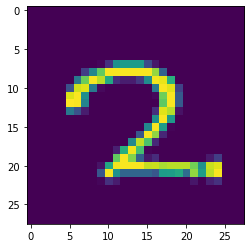

Reconstructed image Autoencoding


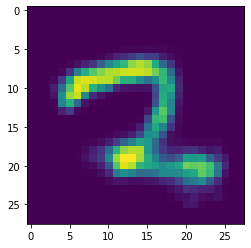

In [36]:
n = 77

print("Original Image")
plt.imshow(X_test[n])
plt.show()

print("Reconstructed image Autoencoding")
plt.imshow(reconstruct[n])
plt.show()

------------------

## Denoising Image

In [37]:
from tensorflow.keras.layers import GaussianNoise

In [38]:
noise = GaussianNoise(0.2)

In [39]:
noisey = noise(X_test[:100],training = True)

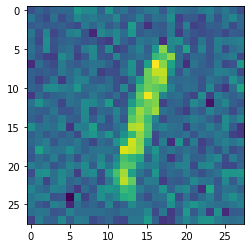

In [41]:
plt.imshow(noisey[5]);

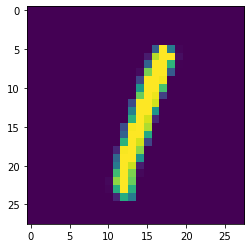

In [42]:
plt.imshow(X_test[5]);

In [43]:
import tensorflow as tf
import numpy as np

In [44]:
tf.random.set_seed(101)
np.random.seed(101)

In [45]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation= "relu"))
encoder.add(Dense(200,activation= "relu"))
encoder.add(Dense(100,activation= "relu"))
encoder.add(Dense(50,activation= "relu"))
encoder.add(Dense(25,activation= "relu"))

In [46]:
decoder = Sequential()
decoder.add(Dense(50,activation= "relu",input_shape = [25]))
decoder.add(Dense(100,activation= "relu"))
decoder.add(Dense(200,activation= "relu"))
decoder.add(Dense(400,activation= "relu"))
decoder.add(Dense(28*28,activation= "sigmoid"))
decoder.add(Reshape(target_shape =  [28,28]))

In [47]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss = "binary_crossentropy", optimizer = "adam",metrics = ["accuracy"])

In [49]:
autoencoder.fit(X_train,X_train, epochs= 8, validation_data=(X_test,X_test))

Epoch 1/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1694 - accuracy: 0.1817 - val_loss: 0.1345 - val_accuracy: 0.2244
Epoch 2/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1295 - accuracy: 0.2326 - val_loss: 0.1206 - val_accuracy: 0.2370
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1204 - accuracy: 0.2465 - val_loss: 0.1155 - val_accuracy: 0.2496
Epoch 4/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1161 - accuracy: 0.2539 - val_loss: 0.1104 - val_accuracy: 0.2589
Epoch 5/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1132 - accuracy: 0.2587 - val_loss: 0.1091 - val_accuracy: 0.2585
Epoch 6/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1107 - accuracy: 0.2629 - val_loss: 0.1064 - val_accuracy: 0.2648
Epoch 7/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1086 - accuracy: 0.2662 - val_loss: 0.1047 - val_ac

In [50]:
denoise = autoencoder(noisey)

The Original


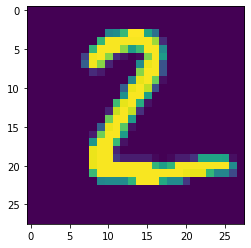

The Noisey Version


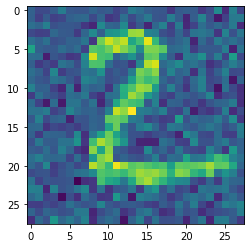

After going through denoiser


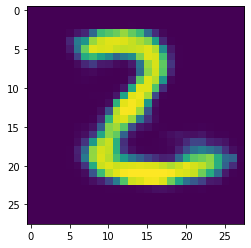

In [51]:
n = 1

print("The Original")
plt.imshow(X_test[n])
plt.show()

print("The Noisey Version")
plt.imshow(noisey[n])
plt.show()

print("After going through denoiser")
plt.imshow(denoise[n])
plt.show()